# Predicting the sale price of Bulldozers using Machine learning

## In this project we will be going through the sample machine learning to predicting the sale price of bulldoers.

* Problem defination

How well can we precit the sale of future bulldozer based on how many was sold earlier.

* Data

The data is donwloaded from kaggle dataset : https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main datasets :

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

* Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Note : The goal for most regression evaluation metrics is to minimixe the error, similiarly our goal in this project will be to build a machine learning model which will minize the RMSLE. 

* Features

Kaggle provides a data dictionary which details all the features of the dataset.
https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Import training and validation dataset
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv")

C:\Users\Subham Dutta\AppData\Local\Temp\ipykernel_26940\1972364853.py:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv")


In [3]:
df.head

<bound method NDFrame.head of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

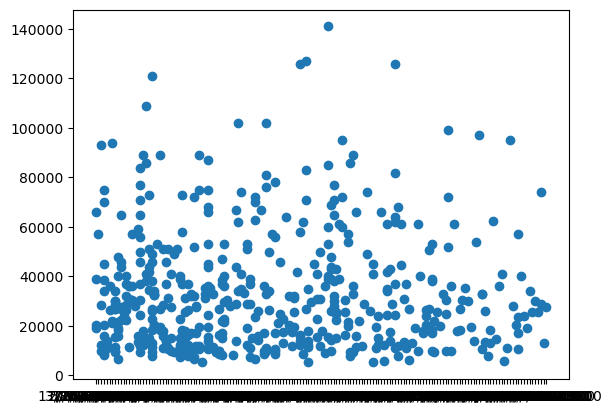

In [6]:
fig, ax= plt.subplots()
ax.scatter(df["saledate"][:500],df["SalePrice"][:500]);


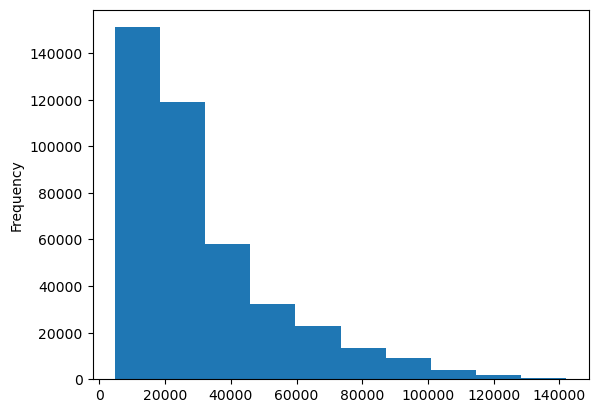

In [7]:
df.SalePrice.plot.hist();

## When we are working with time series data, we want t enrich the date and time component as muchg as possible. 

We can do that by telling the pandas which of pour columns has dates by using `parse_dates` parameters

In [8]:
# Import data one more time
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [9]:
df.saledate.dtype

dtype('<M8[ns]')

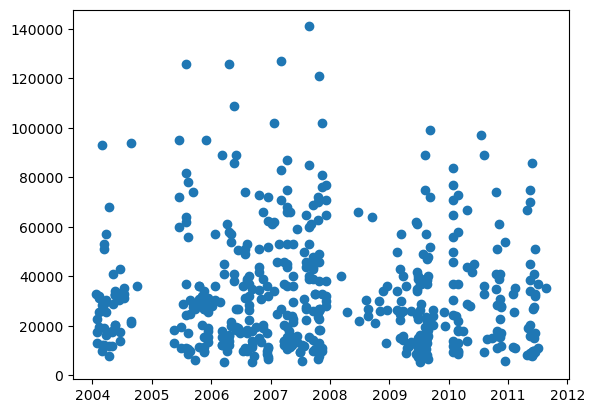

In [10]:
# Now plot the same graph
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:500], df["SalePrice"][:500]);

In [11]:
# now we will sort the data based on sale date, which is a good practise.
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(25)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
144032   1989-01-31
54438    1989-01-31
144952   1989-01-31
205752   1989-01-31
28927    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
df_tmp = df.copy()

In [13]:
df_tmp.saledate.head(30)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
144032   1989-01-31
54438    1989-01-31
144952   1989-01-31
205752   1989-01-31
28927    1989-01-31
86971    1989-01-31
67034    1989-01-31
87602    1989-01-31
53101    1989-01-31
205784   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [14]:
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add a datetime parameter for `saledate` column

In [15]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleofWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saledayofYear"]=df_tmp.saledate.dt.dayofyear

In [16]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [17]:
#Now we have enriched our dataframe, we can remove `saledate` feature
df_tmp.drop("saledate", axis=1, inplace=True)


In [18]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# Modelling


In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
model = RandomForestRegressor(n_jobs=1, random_state=42)

In [21]:
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [22]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [23]:
#Change all these into category
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category")

In [24]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [25]:
df_tmp[df_tmp.select_dtypes(include=['object']).columns] = df_tmp.select_dtypes(include=['object']).astype('category')

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [27]:
# Save the current data so that we can refer that in later future
df_tmp.to_csv("bluebook-for-bulldozers/train_temp.csv", index=False)

# Filling the missing data

In [28]:
#check the numerical columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleofWeek
saledayofYear


In [29]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label] =content.fillna(content.median())           

In [30]:
# Now check if there is any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleofWeek
saledayofYear


In [31]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum() > 0:  # Check if there are any NaN values
            median_value = content.median()  # Calculate median
            df_tmp[label] = content.fillna(median_value)  # Fill NaN with median

In [32]:
# Now check if there is any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        

In [33]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

# Filling and turning categorical values into numbers


In [34]:
# Check for colums which are not numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
#Turn the categorical valkues into numbers and fill the missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to understand whether sample had missing values
        df_tmp[label+"is_mising"]= pd.isnull(content)
        #Turn categories into numbers and add +1
        df_tmp[label]= pd.Categorical(content).codes+1
        

In [36]:
df_tmp.isna().sum()

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
                             ..
Backhoe_Mountingis_mising     0
Blade_Typeis_mising           0
Travel_Controlsis_mising      0
Differential_Typeis_mising    0
Steering_Controlsis_mising    0
Length: 101, dtype: int64

# Now fit the model

In [37]:
%%time
model = RandomForestRegressor(n_jobs=1, random_state=42)
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 12min 42s
Wall time: 22min 18s


RandomForestRegressor(n_jobs=1, random_state=42)

In [39]:
#Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875575311342472

## Splitting the data into training & validation sets

In [40]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_mising,Stick_Lengthis_mising,Thumbis_mising,Pattern_Changeris_mising,Grouser_Typeis_mising,Backhoe_Mountingis_mising,Blade_Typeis_mising,Travel_Controlsis_mising,Differential_Typeis_mising,Steering_Controlsis_mising
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [42]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int32

In [43]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [44]:
# Split the data into training & validation

df_valid = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_valid), len(df_train)

(11573, 401125)

In [48]:
# Split the train & valid data into X and y

X_valid = df_valid.drop("SalePrice", axis=1)
y_valid = df_valid["SalePrice"]

X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

X_valid.shape , y_valid.shape, X_train.shape, y_train.shape

((11573, 100), (11573,), (401125, 100), (401125,))

## Building an evolution function

In [72]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [73]:
def rmsle(y_test, y_preds):
    """
    Calculate true mean squared log error between predictions and true labels. 
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

In [74]:
#Create function to evaluate models on few diff levels

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {"Training MAE ": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, valid_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, valid_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, valid_preds)}
    return scores

### This will take long time to do the calculation, hence we can take sample values ton retrofit the model to run on few thousand samples


In [75]:
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [76]:
show_scores(model)

{'Training MAE ': 5560.157859993769,
 'Valid MAE': 7159.449220599671,
 'Training RMSLE': 0.2576924090674945,
 'Valid RMSLE': 0.29272671101419234,
 'Training R^2': 0.8607164539032933,
 'Valid R^2': 0.833019110858319}

## Hyperparameter tuning with RandomizedSearchCV

In [78]:
from sklearn.model_selection import RandomizedSearchCV

#Diff RandomForest regressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "max_features": [0.5,1, "sqrt", "auto"],
          "max_samples": [10000]}

#Instantaniate
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid, n_iter=2,cv=5, verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [79]:
# Find the best model hyperparameter
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 16,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [80]:
show_scores(rs_model)

{'Training MAE ': 7457.755940335588,
 'Valid MAE': 9033.334059736975,
 'Training RMSLE': 0.3303098502842388,
 'Valid RMSLE': 0.36759588152022044,
 'Training R^2': 0.7670038124591265,
 'Valid R^2': 0.7595936962637629}

In [85]:
%%time
# Now train the model with the best hyperparameter

ideal_model = RandomForestRegressor(n_estimators=70, min_samples_leaf=1, 
                                    min_samples_split=16, max_features=0.5, n_jobs=-1, max_samples=None, random_state=42)

ideal_model.fit(X_train, y_train)                                

CPU times: total: 5min 50s
Wall time: 2min 16s


RandomForestRegressor(max_features=0.5, min_samples_split=16, n_estimators=70,
                      n_jobs=-1, random_state=42)

In [86]:
show_scores(ideal_model)

{'Training MAE ': 3080.7875894201966,
 'Valid MAE': 5952.027483577563,
 'Training RMSLE': 0.14987476614197853,
 'Valid RMSLE': 0.24543009516660083,
 'Training R^2': 0.9554785483866249,
 'Valid R^2': 0.881885168610129}